In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree

In [2]:
#reading data
dataR2 = pd.read_csv('dataR2.csv')

#seperating into predictors and classes
X = dataR2.iloc[:,0:-1]
y = dataR2.iloc[:,-1]
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)


#Random forest model def
def tree_model(xtrain,ytrain):
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    clf.fit(xtrain,ytrain)
    return clf

In [3]:
#Accuracy score with all the features
clf=tree_model(X_train,y_train)
y_pred = clf.predict(X_train)
print("Confusion Matrix")
print(confusion_matrix(y_train, y_pred))
print("Accuracy score: %f" %(accuracy_score(y_train, y_pred)))
print('-------------------------------------------------------')
target_names = ['Controls', 'Patients']
print(classification_report(y_train, y_pred, target_names=target_names))

y_pred = clf.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: %f" %(accuracy_score(y_test, y_pred)))
print('-------------------------------------------------------')
target_names = ['Controls', 'Patients']
print(classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix
[[31  0]
 [ 0 37]]
Accuracy score: 1.000000
-------------------------------------------------------
              precision    recall  f1-score   support

    Controls       1.00      1.00      1.00        31
    Patients       1.00      1.00      1.00        37

   micro avg       1.00      1.00      1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

Confusion Matrix
[[14  6]
 [ 8 18]]
Accuracy score: 0.695652
-------------------------------------------------------
              precision    recall  f1-score   support

    Controls       0.64      0.70      0.67        20
    Patients       0.75      0.69      0.72        26

   micro avg       0.70      0.70      0.70        46
   macro avg       0.69      0.70      0.69        46
weighted avg       0.70      0.70      0.70        46



In [4]:
# StratifiedShuffleSplit
# to find important features in different subsets
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
for train, test in sss.split(X_train, y_train):
    model=tree_model(X_train.iloc[train],y_train.iloc[train])
    #model.fit(X_train.iloc[train],y_train.iloc[train])
    score=pd.DataFrame(model.feature_importances_,index=X_train.columns,columns=['importance'])
    score=score.sort_values('importance', ascending=False) 
    top4=pd.DataFrame(score.index[:4])
    print(top4)
    model2 = tree_model(X_train[top4[0]],y_train)
    y_pred = model2.predict(X_train[top4[0]])
    
    print('-------------------Training Set -----------------------')
    
    print("Confusion Matrix")
    print(confusion_matrix(y_train, y_pred))
    print("Accuracy score: %f" %(accuracy_score(y_train, y_pred)))
    #print('-------------------------------------------------------')
    model2 = tree_model(X_test[top4[0]],y_test)
    y_pred = model2.predict(X_test[top4[0]])
    
    print('-------------------Test Set -----------------------')
    #print('-------------------------------------------------------')
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy score: %f" %(accuracy_score(y_test, y_pred)))
    print('-------------------------------------------------------')
    print('-------------------------------------------------------')



             0
0     Resistin
1        MCP.1
2  Adiponectin
3          BMI
-------------------Training Set -----------------------
Confusion Matrix
[[31  0]
 [ 0 37]]
Accuracy score: 1.000000
-------------------Test Set -----------------------
Confusion Matrix
[[20  0]
 [ 0 26]]
Accuracy score: 1.000000
-------------------------------------------------------
-------------------------------------------------------
          0
0  Resistin
1   Glucose
2    Leptin
3       Age
-------------------Training Set -----------------------
Confusion Matrix
[[31  0]
 [ 0 37]]
Accuracy score: 1.000000
-------------------Test Set -----------------------
Confusion Matrix
[[20  0]
 [ 0 26]]
Accuracy score: 1.000000
-------------------------------------------------------
-------------------------------------------------------
             0
0     Resistin
1  Adiponectin
2          Age
3          BMI
-------------------Training Set -----------------------
Confusion Matrix
[[31  0]
 [ 0 37]]
Accuracy score

In [5]:

#Selected Features
clf=tree_model(X_train[['Age', 'BMI', 'Glucose', 'HOMA']],y_train)
y_pred = clf.predict(X_train[['Age', 'BMI', 'Glucose', 'HOMA']])
print("Confusion Matrix")
print(confusion_matrix(y_train, y_pred))
print("Accuracy score: %f" %(accuracy_score(y_train, y_pred)))
print('-------------------------------------------------------')
target_names = ['Controls', 'Patients']
print(classification_report(y_train, y_pred, target_names=target_names))

y_pred = clf.predict(X_test[['Age', 'BMI', 'Glucose', 'HOMA']])
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: %f" %(accuracy_score(y_test, y_pred)))
print('-------------------------------------------------------')
target_names = ['Controls', 'Patients']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[31  0]
 [ 0 37]]
Accuracy score: 1.000000
-------------------------------------------------------
              precision    recall  f1-score   support

    Controls       1.00      1.00      1.00        31
    Patients       1.00      1.00      1.00        37

   micro avg       1.00      1.00      1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

Confusion Matrix
[[12  8]
 [ 7 19]]
Accuracy score: 0.673913
-------------------------------------------------------
              precision    recall  f1-score   support

    Controls       0.63      0.60      0.62        20
    Patients       0.70      0.73      0.72        26

   micro avg       0.67      0.67      0.67        46
   macro avg       0.67      0.67      0.67        46
weighted avg       0.67      0.67      0.67        46



In [7]:
# Finaltest
#reading data
finaltest = pd.read_csv('final_test.csv')
X_final=finaltest.iloc[:,0:-1]
y_final=finaltest.iloc[:,-1]

y_pred = clf.predict(X_final[['Age', 'BMI', 'Glucose', 'HOMA']])
print("predicting from a seperate test set")
print("Confusion Matrix")
print("True Value ")
print(y_final.values)
print("Predicted Value")
print( y_pred)


predicting from a seperate test set
Confusion Matrix
True Value 
[2 1]
Predicted Value
[2 1]


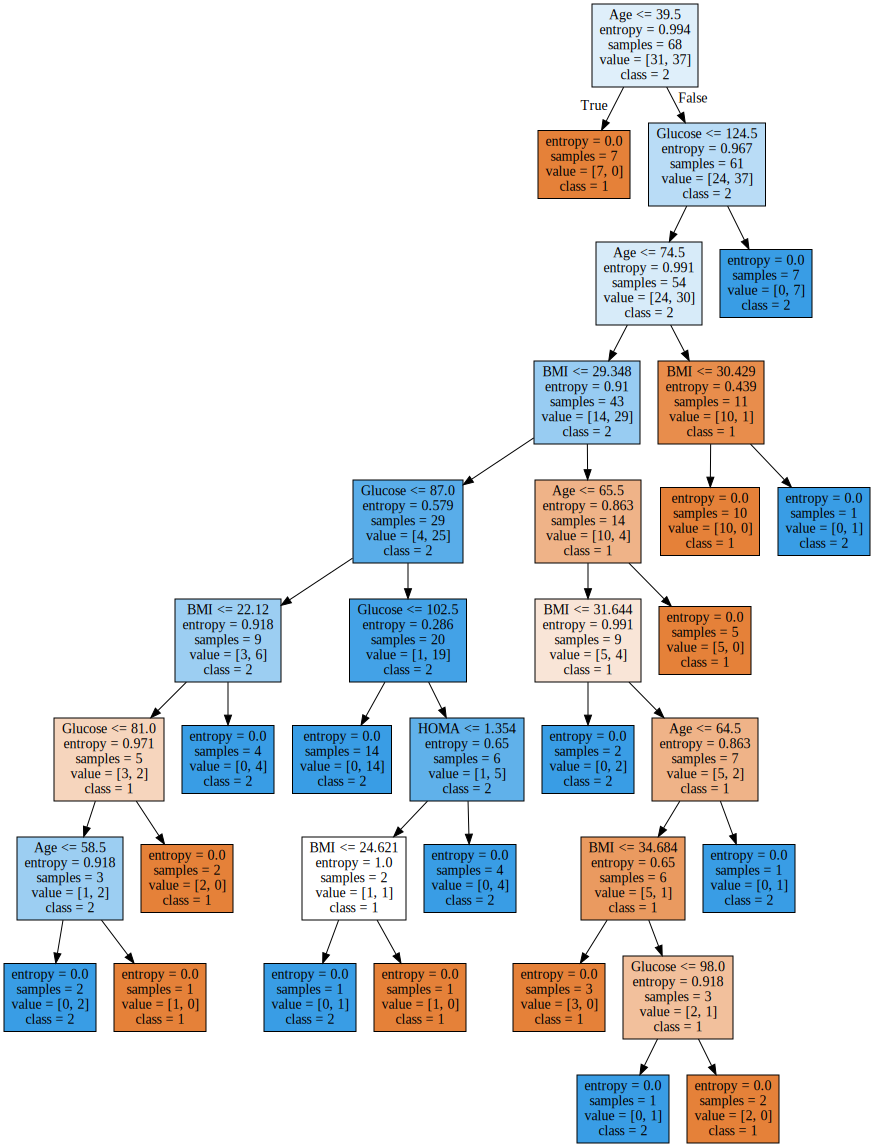

In [6]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=['Age', 'BMI', 'Glucose', 'HOMA'], class_names=['1', '2'] 
   , filled = True))


display(SVG(graph.pipe(format='svg')))